# nh 투자증권 베이스라인

- 참가자분들의 이해를 돕고자 수행한 베이스라인입니다.

- 해당 베이스라인에서 수행하는 방식이 정답은 아닙니다.

&nbsp;

## 사용할 패키지 불러오기

In [ ]:
pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=afb3ce4cceddc004c42531fe308f34dcdb8b2083445ed23c99be342bf16ff24f
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- 한글 폰트 다운 (다운 완료시 런타임 재시작 수행해주세요!)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,889 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandasql import sqldf
import seaborn as sns
from tqdm import tqdm
from sklearn.cluster import KMeans
from matplotlib import rc
import numpy as np
from yellowbrick.cluster import SilhouetteVisualizer
import math
import zipfile
import warnings
warnings.filterwarnings('ignore')
rc('font', family='NanumBarunGothic')

&nbsp;

## 데이터 다운로드 & 불러오기

In [ ]:
!gdown --id 1Qwz-dFgLNcC9zEXY3mqHoLVr73qOgTTv
zf = zipfile.ZipFile("경진대회 예선 데이터.zip")
zf.setpassword(b"nh1212!")
zf.extractall()

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Qwz-dFgLNcC9zEXY3mqHoLVr73qOgTTv
To: /content/경진대회 예선 데이터.zip
100% 12.5M/12.5M [00:00<00:00, 278MB/s]


In [ ]:
info_data = pd.read_csv('./cus_ifo.csv')
kr_data = pd.read_csv('./kr_stk_orr.csv')
oss_data = pd.read_csv('./oss_stk_orr.csv')
cus_tot_data = pd.read_csv('./cus_tot_aet_ifo.csv')

## 국내 및 해외 주식 거래횟수 시각화

- 거래횟수 가져오기

In [ ]:
ko_data = sqldf('select a.cus_no as "고객번호", a.act_no as "계좌번호", count(a.act_no) as "국내 주식 거래횟수" from info_data as a join kr_data as b on a.act_no = b.act_no group by a.act_no')
os_data = sqldf('select a.cus_no as "고객번호", a.act_no as "계좌번호", count(a.act_no) as "해외 주식 거래횟수" from info_data as a join oss_data as b on a.act_no = b.act_no group by a.act_no')

- 거래횟수 시각화

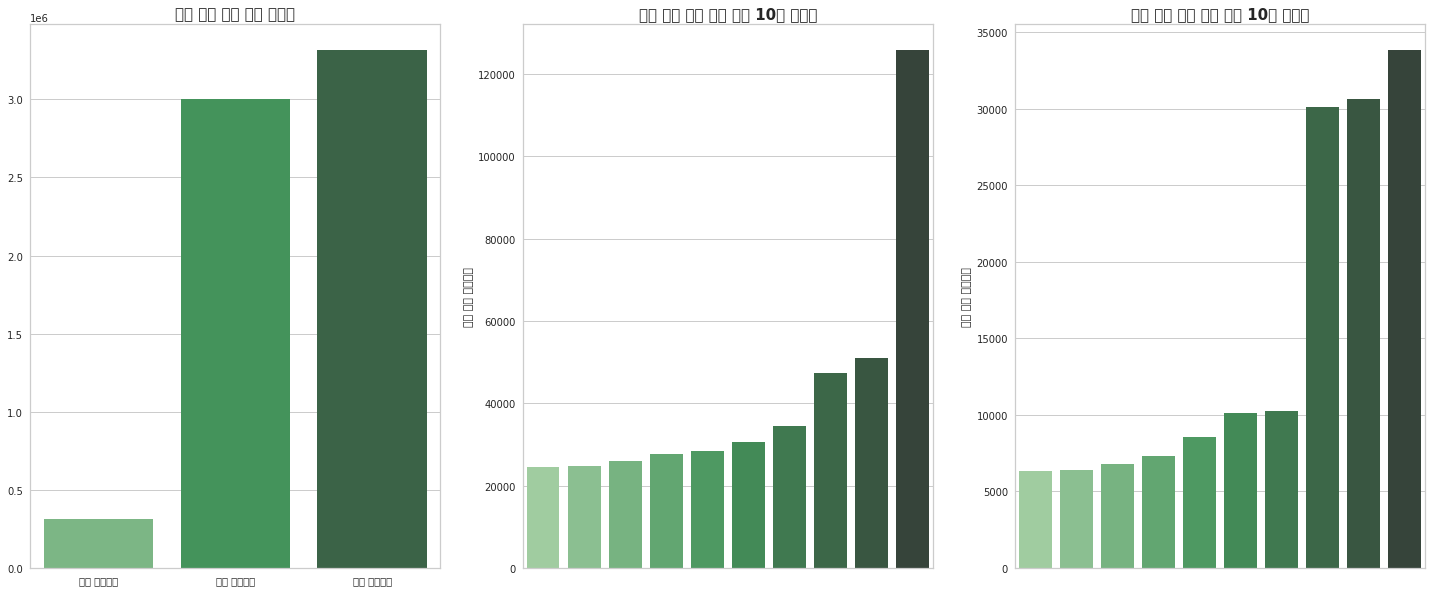

In [ ]:
fig = plt.figure(figsize=(25,10))

plot_1 = fig.add_subplot(1,3,1)
plot_2 = fig.add_subplot(1,3,2)
plot_3 = fig.add_subplot(1,3,3)

new_df = pd.DataFrame()
new_df['전체 거래횟수'] = [sum(ko_data['국내 주식 거래횟수']) + sum(os_data['해외 주식 거래횟수'])]
new_df['국내 거래횟수'] = [sum(ko_data['국내 주식 거래횟수'])]
new_df['해외 거래횟수'] = [sum(os_data['해외 주식 거래횟수'])]

all_plt = sns.barplot(x=new_df.columns[::-1], y=new_df.values[0][::-1],palette="Greens_d", ax=plot_1)
all_plt.set_title('전체 주식 거래 횟수 시각화', weight='bold', fontsize=15)


ko_set_plt = ko_data.nlargest(10,"국내 주식 거래횟수").sort_values(by='국내 주식 거래횟수')
ko_plt = sns.barplot(data=ko_set_plt, x=[str(i) for i in ko_set_plt.index], y="국내 주식 거래횟수", palette="Greens_d", ax=plot_2)
ko_plt.set_title('국내 주식 거래 횟수 상위 10개 시각화', weight='bold', fontsize=15)
ko_plt.set(xticklabels=[])

os_set_plt = os_data.nlargest(10,"해외 주식 거래횟수").sort_values(by='해외 주식 거래횟수')
os_plot = sns.barplot(x=[str(i) for i in os_set_plt.index],y="해외 주식 거래횟수",data=os_set_plt, palette="Greens_d", ax=plot_3)
os_plot.set_title('해외 주식 거래 횟수 상위 10개 시각화', weight='bold', fontsize=15)
os_plot.set(xticklabels=[])

plt.show()

- 전체 주식거래에서 국내가 차지하는 비율이 해외의 거래 비율보다 매우 크다는 것을 확인할 수 있습니다. (국내시장의 규모가 훨씬 큼)
- 해외 주식의 거래 횟수는 국내에 비해 적지만 해외 주식거래 상위 10개 그래프를 확인했을 때 어느 정도 충분한 거래가 이루어지고 있다는 것을 확인할 수 있습니다.


> 이를 통해서 국내 주식만 투자하는 고객, 해외 거래만 투자하는 고객, 둘 다 투자하는 고객으로 크게 3개의 집단으로 나누고 점차 세부적으로 파악하는 방향으로 설정했습니다.


&nbsp;

## 국내 주식만 투자하는 고객, 해외 거래만 투자하는 고객, 둘다 투자하는 고객 나누기

In [ ]:
ko_real = sqldf('select a.act_no as "계좌번호", count(a.act_no) as "국내 주식 거래횟수" from kr_data as a group by a.act_no')
os_real = sqldf('select a.act_no as "계좌번호", count(a.act_no) as "해외 주식 거래횟수" from oss_data as a group by a.act_no')

# 국내 주식만 하는 고객
only_ko = list(set(list(ko_real['계좌번호'])) - set(list(os_real['계좌번호'])))
only_ko_df = ko_real.loc[ko_real['계좌번호'].isin(only_ko)]

# 해외 주식만 하는 고객
only_os = list(set(list(os_real['계좌번호'])) - set(list(ko_real['계좌번호'])))
only_os_df = os_real.loc[os_real['계좌번호'].isin(only_os)]

# 둘다 같이 하는 고객
all_of = list(set(list(os_real['계좌번호'])) & set(list(ko_real['계좌번호'])))
all_of_df1 = ko_real.loc[ko_real['계좌번호'].isin(all_of)]
all_of_df2 = os_real.loc[os_real['계좌번호'].isin(all_of)]

all_of_df = pd.merge(all_of_df1, all_of_df2 ,how='outer',on='계좌번호')

# info 데이터에서 국내, 해외, 둘다 하는 각 고객의 정보 가져오기
ko = info_data.loc[info_data['act_no'].isin(only_ko_df['계좌번호'])]
os = info_data.loc[info_data['act_no'].isin(only_os_df['계좌번호'])]
ko_os = info_data.loc[info_data['act_no'].isin(all_of_df['계좌번호'])]

&nbsp;

## 각각의 DataFrame 에서 6개월간 변하지 않는 값 + 실제 사용할 열 추가

- 데이터가 1월~6월까지 변동이 있는 열도 존재하고 변동이 없는 열도 존재
- 변동이 없는 열은 그대로 사용하고 변동이 있는 열은 가장 최근에 데이터를 가져옴

In [ ]:
def info_get_col(info_df, only_df):

    sum_df = pd.DataFrame()

    for i in tqdm(only_df['계좌번호']):
        sep = info_df.loc[info_df['act_no'].isin([i])]
        real_col_list = []

        for col in sep.columns:  # 6개월간 변동이 없는 열 그대로 선택
            if len(sep[col].unique()) == 1:
                real_col_list.append(col)

        # 6개월 안에 변동이 생기는 열 중에서 사용할 열을 가장 최근의 데이터로 가져옴
        real_col = list(set(real_col_list + ['cus_age_stn_cd', 'cus_aet_stn_cd', 'pft_amt_stn_cd', 'loy_sgm_cd', 'lsg_sgm_cd', 'mrz_pdt_tp_sgm_cd', 'tco_cus_grd_cd', 'tot_ivs_te_sgm_cd', 'mrz_mkt_dit_cd', 'mrz_btp_dit_cd', 'aet_bse_stk_trd_tp_cd']))
        new_sep = sep.loc[sep['bse_ym'] == sep['bse_ym'].max(), real_col].copy()

        sum_df = pd.concat([sum_df,new_sep], axis=0)
        sum_df.reset_index(inplace=True, drop=True)

    return sum_df

In [ ]:
pre_ko_df = info_get_col(ko, only_ko_df)
pre_os_df = info_get_col(os, only_os_df)
pre_ko_os_df = info_get_col(ko_os, all_of_df)


100%|██████████| 670/670 [00:04<00:00, 139.77it/s]


In [ ]:
pre_os_df.count()

cus_age_stn_cd           324
fst_act_opn_dt           324
sex_dit_cd               324
pft_amt_stn_cd           324
hld_pdt_tp_sgm_cd        275
mrz_btp_dit_cd           323
mrz_pdt_tp_sgm_cd        324
mrz_mkt_dit_cd           323
cus_aet_stn_cd           324
loy_sgm_cd               324
tco_cus_grd_cd           324
tot_ivs_te_sgm_cd        324
lsg_sgm_cd               324
cus_no                   324
aet_bse_stk_trd_tp_cd    323
stk_pdt_hld_yn           317
ose_stk_pdt_hld_yn       260
act_no                   324
mts_mm_access_type       324
bas_stk_trd_tp_cd        205
dtype: int64

- 최소의 열을 가진 고객군을 기준으로 다른 고객군 열 맞추기

In [ ]:
print('국내 주식 고객군 : ',len(pre_ko_df.columns))
print('해외 주식 고객군 : ',len(pre_os_df.columns)) # 기준
print('국내 + 해외 주식 고객군 : ',len(pre_ko_os_df.columns))


pre_ko_df = pre_ko_df[pre_os_df.columns]
pre_ko_os_df = pre_ko_os_df[pre_os_df.columns]

국내 주식 고객군 :  21
해외 주식 고객군 :  20
국내 + 해외 주식 고객군 :  21


&nbsp;

## 변동률 계산

- 고객의 계좌에 자산은 1월~6월까지 변동이 있는 데이터입니다.
- 변동되는 데이터를 사용하기보다는 1~6월까지의 자산을 대표하는 변수를 생성하기 위해 변동률을 계산합니다.
- 실제 데이터에서는 1월이 NAN 이거나 2월까지 NAN인 항목이 존재 첫 자산이 등록된 것을 기준으로 첫 자산 대비 마지막 자산의 변동률을 계산했습니다.
- 첫 값과 끝값이 모두 0이면 0으로

**공식**
- t : 계좌에 첫 자산
- end : 6월 계좌 자산

- $ \frac{end-t}{t} * 100 $


&nbsp;

- 고객 자산정보 가져오기

In [ ]:
asset_ko = sqldf('select distinct * from pre_ko_df as a left join cus_tot_data as b on a.cus_no = b.cus_no AND a.act_no = b.act_no')
asset_ko = asset_ko.loc[:, ~asset_ko.T.duplicated()]

asset_os_df = sqldf('select distinct * from pre_os_df as a left join cus_tot_data as b on a.cus_no = b.cus_no AND a.act_no = b.act_no')
asset_os_df = asset_os_df.loc[:, ~asset_os_df.T.duplicated()]

asset_ko_os_df = sqldf('select distinct * from pre_ko_os_df as a left join cus_tot_data as b on a.cus_no = b.cus_no AND a.act_no = b.act_no')
asset_ko_os_df = asset_ko_os_df.loc[:, ~asset_ko_os_df.T.duplicated()]

- 변동률 계산

In [ ]:
def make_rate(df):
    rate = []
    last_name = 'tot_aet_tld_rnd_202206'
    aet_name = 'tot_aet_tld_rnd_20220'

    for i in tqdm(range(len(df))):
        d = 1
        while True:
            if np.isnan(df[aet_name + str(d)][i]) == True:
                d+=1
            else:
                rate.append((df[last_name][i] - df[aet_name + str(d)][i]) / df[aet_name + str(d)][i] * 100)
                break

    return [0 if math.isnan(x) else x for x in rate]


asset_ko['변동률'] = make_rate(asset_ko)
asset_os_df['변동률'] = make_rate(asset_os_df)
asset_ko_os_df['변동률'] = make_rate(asset_ko_os_df)

100%|██████████| 670/670 [00:00<00:00, 30732.54it/s]


&nbsp;

## 열이름 변경, 거래횟수 데이터 추가

In [ ]:
asset_ko = asset_ko.rename(columns={'cus_no' :'고객번호',
                          'tco_cus_grd_cd' : '고객등급코드',
                          'fst_act_opn_dt' : '최초계좌개설일',
                          'act_no' : '계좌번호',
                          'hld_pdt_tp_sgm_cd' : '보유상품유형세그먼트코드',
                          'tot_ivs_te_sgm_cd' : '총투자기간세그먼트코드',
                          'mrz_pdt_tp_sgm_cd' : '주거래상품군',
                          'cus_aet_stn_cd' : '고객자산구간코드',
                          'lsg_sgm_cd' : 'LIFESTAGE세그먼트코드',
                          'sex_dit_cd' : '성별',
                          'aet_bse_stk_trd_tp_cd' : '자산기준주식거래유형코드',
                          'mrz_btp_dit_cd' : '주거래업종구분코드',
                          'mrz_mkt_dit_cd' : '주거래시장구분코드',
                          'cus_age_stn_cd': '연령대',
                          'pft_amt_stn_cd' : '수익금액구간코드',
                          'loy_sgm_cd' : '충성도세그먼트코드',
                          'mts_mm_access_type' : 'MTS월단위접속패턴',
                          'tot_aet_tld_rnd_202201' : '2022년1월총자산',
                          'tot_aet_tld_rnd_202202' : '2022년2월총자산',
                          'tot_aet_tld_rnd_202203' : '2022년3월총자산',
                          'tot_aet_tld_rnd_202204' : '2022년4월총자산',
                          'tot_aet_tld_rnd_202205' : '2022년5월총자산',
                          'tot_aet_tld_rnd_202206' : '2022년6월총자산'
                          })

asset_os_df = asset_os_df.rename(columns={'cus_no' :'고객번호',
                          'tco_cus_grd_cd' : '고객등급코드',
                          'fst_act_opn_dt' : '최초계좌개설일',
                          'act_no' : '계좌번호',
                          'hld_pdt_tp_sgm_cd' : '보유상품유형세그먼트코드',
                          'tot_ivs_te_sgm_cd' : '총투자기간세그먼트코드',
                          'mrz_pdt_tp_sgm_cd' : '주거래상품군',
                          'cus_aet_stn_cd' : '고객자산구간코드',
                          'lsg_sgm_cd' : 'LIFESTAGE세그먼트코드',
                          'sex_dit_cd' : '성별',
                          'aet_bse_stk_trd_tp_cd' : '자산기준주식거래유형코드',
                          'mrz_btp_dit_cd' : '주거래업종구분코드',
                          'mrz_mkt_dit_cd' : '주거래시장구분코드',
                          'cus_age_stn_cd': '연령대',
                          'pft_amt_stn_cd' : '수익금액구간코드',
                          'loy_sgm_cd' : '충성도세그먼트코드',
                          'mts_mm_access_type' : 'MTS월단위접속패턴',
                          'tot_aet_tld_rnd_202201' : '2022년1월총자산',
                          'tot_aet_tld_rnd_202202' : '2022년2월총자산',
                          'tot_aet_tld_rnd_202203' : '2022년3월총자산',
                          'tot_aet_tld_rnd_202204' : '2022년4월총자산',
                          'tot_aet_tld_rnd_202205' : '2022년5월총자산',
                          'tot_aet_tld_rnd_202206' : '2022년6월총자산'
                          })

asset_ko_os_df = asset_ko_os_df.rename(columns={'cus_no' :'고객번호',
                          'tco_cus_grd_cd' : '고객등급코드',
                          'fst_act_opn_dt' : '최초계좌개설일',
                          'act_no' : '계좌번호',
                          'hld_pdt_tp_sgm_cd' : '보유상품유형세그먼트코드',
                          'tot_ivs_te_sgm_cd' : '총투자기간세그먼트코드',
                          'mrz_pdt_tp_sgm_cd' : '주거래상품군',
                          'cus_aet_stn_cd' : '고객자산구간코드',
                          'lsg_sgm_cd' : 'LIFESTAGE세그먼트코드',
                          'sex_dit_cd' : '성별',
                          'aet_bse_stk_trd_tp_cd' : '자산기준주식거래유형코드',
                          'mrz_btp_dit_cd' : '주거래업종구분코드',
                          'mrz_mkt_dit_cd' : '주거래시장구분코드',
                          'cus_age_stn_cd': '연령대',
                          'pft_amt_stn_cd' : '수익금액구간코드',
                          'loy_sgm_cd' : '충성도세그먼트코드',
                          'mts_mm_access_type' : 'MTS월단위접속패턴',
                          'tot_aet_tld_rnd_202201' : '2022년1월총자산',
                          'tot_aet_tld_rnd_202202' : '2022년2월총자산',
                          'tot_aet_tld_rnd_202203' : '2022년3월총자산',
                          'tot_aet_tld_rnd_202204' : '2022년4월총자산',
                          'tot_aet_tld_rnd_202205' : '2022년5월총자산',
                          'tot_aet_tld_rnd_202206' : '2022년6월총자산'
                          })

set_ko = pd.merge(asset_ko, only_ko_df, how='left',on='계좌번호')
set_os = pd.merge(asset_os_df, only_os_df, how='left',on='계좌번호')
set_ko_os = pd.merge(asset_ko_os_df, all_of_df, how='left',on='계좌번호')

In [ ]:
set_ko

,연령대,최초계좌개설일,성별,수익금액구간코드,보유상품유형세그먼트코드,주거래업종구분코드,주거래상품군,주거래시장구분코드,고객자산구간코드,충성도세그먼트코드,...,MTS월단위접속패턴,bas_stk_trd_tp_cd,2022년1월총자산,2022년2월총자산,2022년3월총자산,2022년4월총자산,2022년5월총자산,2022년6월총자산,변동률,국내 주식 거래횟수
0,1,20201201,1,1,1.0,10.0,2,2.0,2,4.0,...,1001,None,12838237.0,12723863.0,12448513.0,12414235.0,12428927.0,14335449.0,11.662131,2
1,9,20200825,1,1,1.0,10.0,2,2.0,1,4.0,...,111111,None,2177307.0,24591478.0,10643554.0,7030283.0,7027915.0,6744912.0,209.782314,685
2,9,20201227,2,1,1.0,9.0,2,1.0,4,4.0,...,111111,None,99958023.0,99206212.0,103832787.0,101964302.0,101474455.0,97806007.0,-2.152920,47
3,4,20200924,1,1,1.0,9.0,2,5.0,1,5.0,...,111111,None,6224121.0,6583157.0,7032789.0,6655856.0,6790856.0,6638010.0,6.649758,19
4,3,20210224,2,1,NaN,12.0,2,1.0,1,4.0,...,111111,None,3402215.0,4704502.0,5107587.0,8612058.0,2958760.0,3241459.0,-4.725039,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,7,20210214,2,1,1.0,16.0,2,6.0,4,4.0,...,111111,None,51488838.0,70072303.0,69886236.0,70663024.0,61785738.0,55099078.0,7.011694,78
5969,3,20200506,2,1,1.0,16.0,2,6.0,1,5.0,...,110110,None,12515315.0,13048055.0,10512945.0,10238156.0,10271508.0,7850448.0,-37.273269,1
5970,4,20210208,2,1,1.0,16.0,2,6.0,1,5.0,...,11110,None,3049800.0,3040600.0,2898000.0,2727800.0,2792200.0,2392000.0,-21.568627,1
5971,8,20210507,1,1,1.0,16.0,2,6.0,1,5.0,...,110000,None,2146615.0,2312615.0,1914215.0,1325181.0,1810731.0,1607381.0,-25.120201,3


&nbsp;

## 필요없는 열 제거

In [ ]:
set_ko.drop(['최초계좌개설일', 'MTS월단위접속패턴',
             '2022년1월총자산','2022년2월총자산', '2022년3월총자산', '2022년4월총자산', '2022년5월총자산', '2022년6월총자산', 'ose_stk_pdt_hld_yn', 'stk_pdt_hld_yn' , 'bas_stk_trd_tp_cd'],axis=1, inplace=True)
set_os.drop(['최초계좌개설일', 'MTS월단위접속패턴',
             '2022년1월총자산','2022년2월총자산', '2022년3월총자산', '2022년4월총자산', '2022년5월총자산', '2022년6월총자산', 'ose_stk_pdt_hld_yn', 'stk_pdt_hld_yn' , 'bas_stk_trd_tp_cd'],axis=1, inplace=True)
set_ko_os.drop(['최초계좌개설일', 'MTS월단위접속패턴',
                '2022년1월총자산','2022년2월총자산', '2022년3월총자산', '2022년4월총자산', '2022년5월총자산', '2022년6월총자산', 'ose_stk_pdt_hld_yn', 'stk_pdt_hld_yn' , 'bas_stk_trd_tp_cd'],axis=1, inplace=True)

&nbsp;

## 데이터 이상치 처리

- 데이터 안에 inf, 99, nan 이상치로 판단

In [ ]:
def del_df(df):
    del_list = []
    for i in tqdm(df.columns):
        del_list += list(df[df[i].isin([99, np.inf, -np.inf , np.nan])].index)

    new_df = df.drop(del_list).copy()
    new_df.reset_index(drop=True,inplace=True)
    return new_df


set_ko = del_df(set_ko)
set_os = del_df(set_os)
set_ko_os = del_df(set_ko_os)

100%|██████████| 18/18 [00:00<00:00, 1601.73it/s]


&nbsp;

## 군집화 전 고객군 분석

- 각 고객군 거래량 시각화

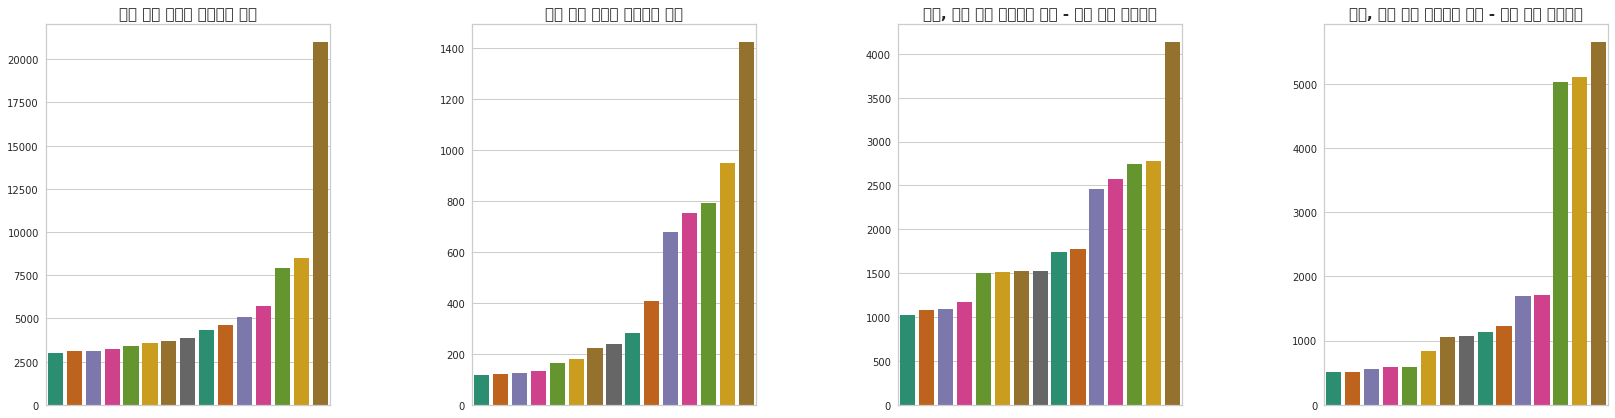

In [ ]:
fig = plt.figure(figsize=(28,7))
plt.subplots_adjust(wspace=0.5, hspace = 0.4)

plot_1 = fig.add_subplot(1,4,1)
plot_2 = fig.add_subplot(1,4,2)
plot_3 = fig.add_subplot(1,4,3)
plot_4 = fig.add_subplot(1,4,4)


set_df = set_ko.nlargest(15,'국내 주식 거래횟수').sort_values(by='국내 주식 거래횟수')
set_df_1 = sns.barplot(x=[str(i) for i in set_df.index], y ='국내 주식 거래횟수', data = set_df ,ax = plot_1,  palette="Dark2")
set_df_1.set_title('국내 주식 거래만 사용하는 고객', fontsize= 15, weight='bold')
set_df_1.set(xticklabels=[])
set_df_1.set(xlabel=None)
set_df_1.set(ylabel=None)
set_df_1.tick_params(bottom=False)

set_df2 = set_os.nlargest(15,'해외 주식 거래횟수').sort_values(by='해외 주식 거래횟수')
set_df_2 = sns.barplot(x=[str(i) for i in set_df2.index], y ='해외 주식 거래횟수', data = set_df2 ,ax = plot_2,  palette="Dark2")
set_df_2.set_title('해외 주식 거래만 사용하는 고객', fontsize= 15, weight='bold')
set_df_2.set(xticklabels=[])
set_df_2.set(xlabel=None)
set_df_2.set(ylabel=None)
set_df_2.tick_params(bottom=False)

set_d3 = set_ko_os.nlargest(15,'국내 주식 거래횟수').sort_values(by='국내 주식 거래횟수')
set_df_3 = sns.barplot(x=[str(i) for i in set_d3.index], y ='국내 주식 거래횟수', data = set_d3 ,ax = plot_3,  palette="Dark2")
set_df_3.set_title('국내, 해외 둘다 사용하는 고객 - 국내 주식 거래횟수', fontsize= 15, weight='bold')
set_df_3.set(xticklabels=[])
set_df_3.set(xlabel=None)
set_df_3.set(ylabel=None)
set_df_3.tick_params(bottom=False)

set_d4 = set_ko_os.nlargest(15,'해외 주식 거래횟수').sort_values(by='해외 주식 거래횟수')
set_df_4 = sns.barplot(x=[str(i) for i in set_d4.index], y ='해외 주식 거래횟수', data = set_d4 ,ax = plot_4,  palette="Dark2")
set_df_4.set_title('국내, 해외 둘다 사용하는 고객 - 해외 주식 거래횟수', fontsize= 15, weight='bold')
set_df_4.set(xticklabels=[])
set_df_4.set(xlabel=None)
set_df_4.set(ylabel=None)
set_df_4.tick_params(bottom=False)


plt.show()

- 거래 횟수를 통해 국내 주식을 사용하는 고객의 거래 횟수가 다른 두 집단보다 거래 횟수가 크고
- 해외 주식만을 이용하는 고객은 두 집단에 비해 낮은 거래 횟수를 보입니다.
- 국내, 해외 모두 거래하는 고객은 국내와 해외의 거래 횟수가 비슷하게 가는 양상을 볼 수 있습니다.



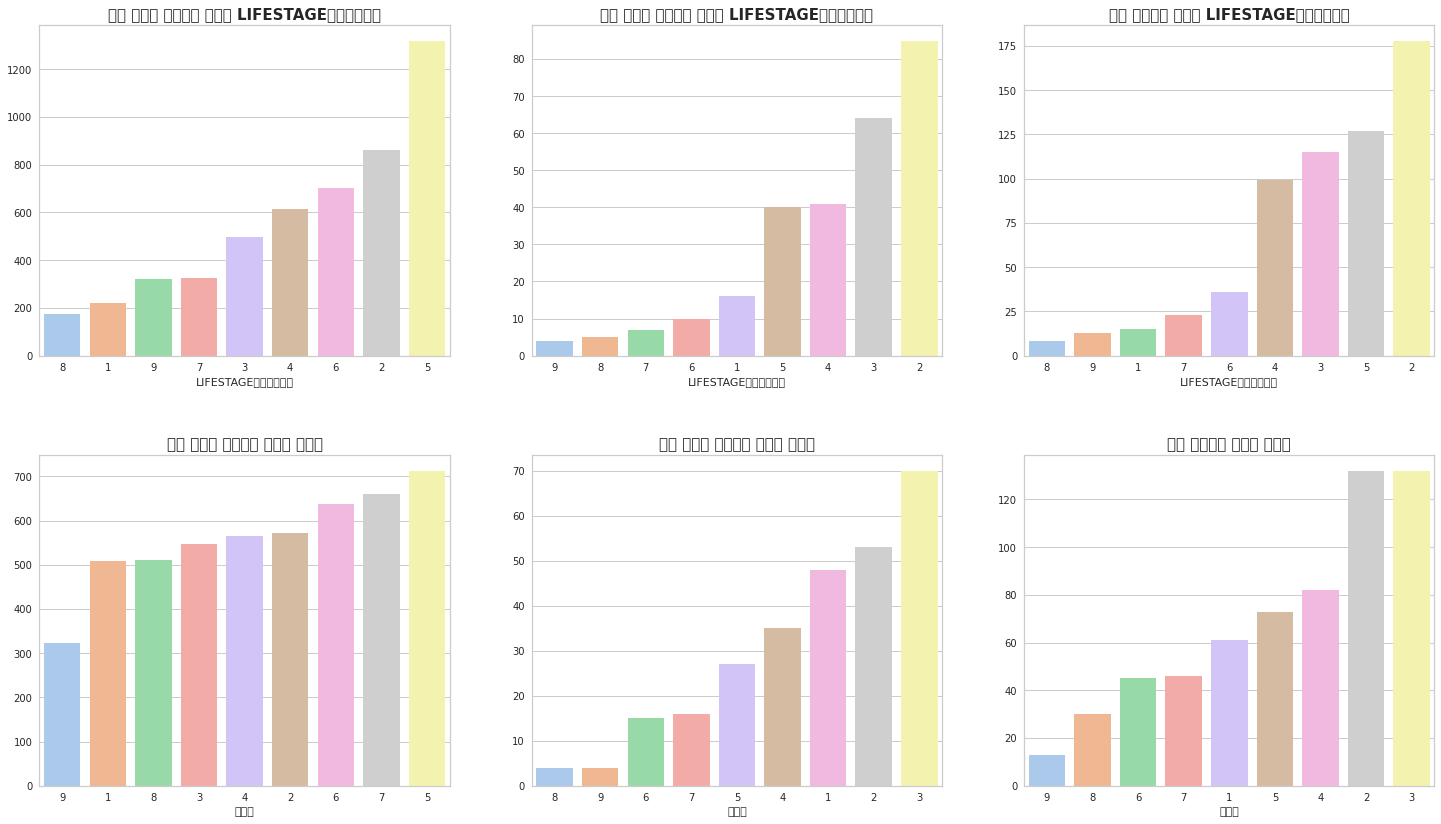

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=3 , figsize=(25,14))
plt.subplots_adjust(wspace=0.2, hspace = 0.3)

name_list = ['LIFESTAGE세그먼트코드', '연령대' ]
group_name = ['국내 주식만 사용하는 고객', '해외 주식만 사용하는 고객', '둘다 사용하는 고객']
plot_data = [set_ko, set_os,set_ko_os]

for i in range(2):
  for j in range(3):
    plot_1 = sns.countplot(x=name_list[i], order = plot_data[j][name_list[i]].value_counts().index[::-1],data=plot_data[j] ,ax = ax[i,j], palette='pastel')
    plot_1.set_title(f"{group_name[j]}의 {name_list[i]}", weight='bold', fontsize=15)
    plot_1.set(ylabel=None)

  
plt.show()

- LIFESTAGE세그먼트코드 를 통해서 확인했을 때는 국내 주식을 가장 많이 이용하는 것은 40~44 사이의 `가족 성숙기_직장인`, `가족 성숙기_주부`, `가족 성숙기_남자`

- 해외 주식만 사용하는 고객은 20~29 사이의 `사회초년생`, `가족 형성기_남자` 


- 둘 다 사용하는 고객은 20~29 사이의 `사회초년생`, `가족 형성기_남자`

&nbsp;

> 이를 통해서 상품을 추천할 때 해외 주식 관련에는 25 ~ 29 사이의 `사회초년생`, `가족 형성기_남자`에게, 국내 주식 관련에는 40~44 사이의 `가족 성숙기`에 해당하는 고객에게 추천할수록 반응이 높을 것 같습니다.

> 빠르게 상품 추천을 할 때는 주식을 하는 유형에 따라서 타겟팅을 하는 것이 효과적이라고 판단됩니다.




&nbsp;

## 키매칭 저장 &  데이터 정규화

- 정규화를 수행하기 전에 고객 구분, 계좌 구분을 따로 기록합니다.
- 데이터 사이의 분포가 매우 다양하므로 정규화를 수행합니다.
- 데이터 안의 범위가 - ,+ 모두 존재하기 때문에 standard scaler를 활용했습니다.


In [ ]:
dict_ko_cus = {d:i for d,i in enumerate(set_ko['고객번호'])}
dict_os_cus = {d:i for d,i in enumerate(set_os['고객번호'])}
dict_ko_os_cus = {d:i for d,i in enumerate(set_ko_os['고객번호'])}

dict_ko_act = {d:i for d,i in enumerate(set_ko['계좌번호'])}
dict_os_act = {d:i for d,i in enumerate(set_os['계좌번호'])}
dict_ko_os_act = {d:i for d,i in enumerate(set_ko_os['계좌번호'])}


set_ko = set_ko.drop(['고객번호', '계좌번호'],axis=1)
set_os = set_os.drop(['고객번호', '계좌번호'],axis=1)
set_ko_os = set_ko_os.drop(['고객번호', '계좌번호'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
set_ko_sc = scaler.fit_transform(set_ko)
set_os_sc = scaler.fit_transform(set_os)

# 둘다하는 고객은 거래의 총합으로 계산
set_ko_os['총거래 횟수'] = set_ko_os['국내 주식 거래횟수'] + set_ko_os['해외 주식 거래횟수']
set_ko_os = set_ko_os.drop(['국내 주식 거래횟수', '해외 주식 거래횟수'], axis=1)

set_ko_os_sc = scaler.fit_transform(set_ko_os)

&nbsp;

## 적절한 군집수 찾기

In [ ]:
def plot_Silhouette(data,  k, text):
    km = KMeans(n_clusters=k, init='k-means++', random_state=119)
    km.fit(data)

    fig = plt.figure()
    fig.set_size_inches(15, 5)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(data)

    visualizer.ax.set_title(text,fontsize=15, weight='bold')
    visualizer.ax.set_xlabel("Silhouette Value",fontsize=15, weight='bold')
    visualizer.ax.set_ylabel("군집",fontsize=15, weight='bold')
    visualizer.ax.set_yticks([])

    plt.show()

- 국내 주식만 하는 고객군

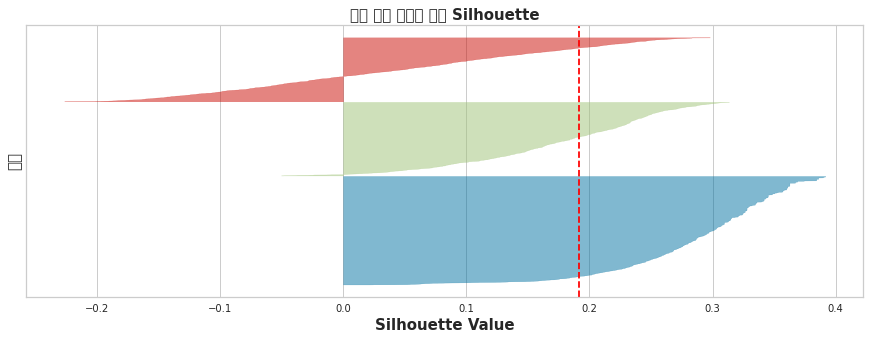

In [ ]:
plot_Silhouette(set_ko_sc, 3, '국내 주식 고객군 군집 Silhouette')

- 해외 주식만 하는 고객군

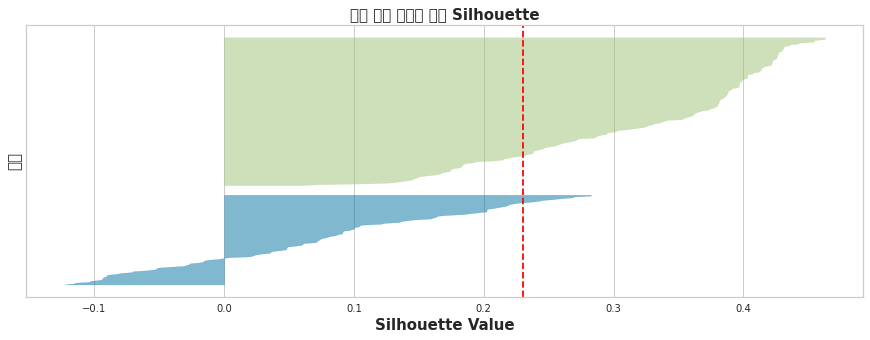

In [ ]:
plot_Silhouette(set_os_sc, 2, '해외 주식 고객군 군집 Silhouette')

- 둘다 하는 고객군

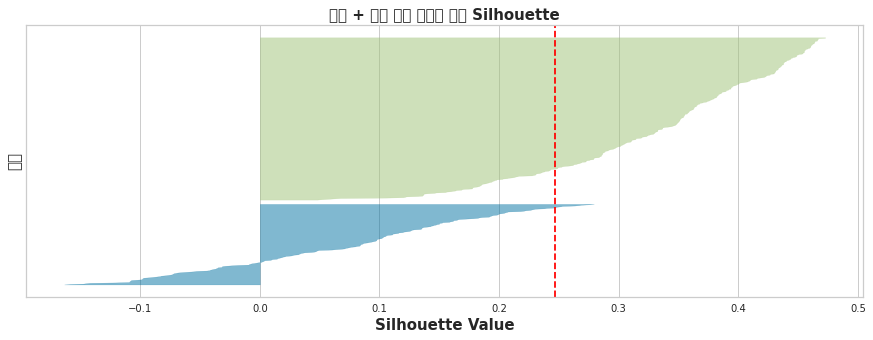

In [ ]:
plot_Silhouette(set_ko_os_sc, 2, '국내 + 해외 주식 고객군 군집 Silhouette')

&nbsp;

## 찾은 군집수 적용

In [ ]:
km1 = KMeans(n_clusters=3, init='k-means++', random_state=119).fit(set_ko_sc)
km2 = KMeans(n_clusters=2,  init='k-means++', random_state=119).fit(set_os_sc)
km3 = KMeans(n_clusters=2,  init='k-means++', random_state=119).fit(set_ko_os_sc)

set_ko['군집'] = km1.predict(set_ko_sc)
set_os['군집'] = km2.predict(set_os_sc)
set_ko_os['군집'] = km3.predict(set_ko_os_sc)

- 고객군 변동률 반올림

In [ ]:
set_ko['변동률'] = round(set_ko['변동률'] ,2)
set_os['변동률'] = round(set_os['변동률'] ,2)
set_ko_os['변동률'] = round(set_ko_os['변동률'] ,2)

&nbsp;

## 군집 시각화

In [ ]:
def group_plot(df, g, name_list):

  fig, axes = plt.subplots(g,len(name_list),figsize=(50, 10))
  plt.subplots_adjust(wspace=0.3, hspace = 0.5)

  for i in range(g):
    for num in range(len(name_list)):

      if num != len(name_list)-1 :
        plot1 = sns.countplot(x=name_list[num], data=df.loc[df['군집'] == i], order = df.loc[df['군집'] == i][name_list[num]].value_counts().iloc[:5].index[::-1], ax=axes[i, num]) 
        plot1.set_title(f'군집 : {i}' + ' ' + name_list[num] ,fontsize=15 , weight='bold')
        plot1.set_xlabel(' ')
        plot1.set_ylabel(' ')

      else:
        plot1 = sns.countplot(x=name_list[num], data=df.loc[df['군집'] == i], order = df.loc[df['군집'] == i][name_list[num]].value_counts().iloc[:5].index[::-1], ax=axes[i, num]) 
        plot1.set_title(f'군집 : {i}' + ' ' + name_list[num] ,fontsize=15 , weight='bold')
        plot1.set_xlabel(' ')
        plot1.set_ylabel(' ')
        plot1.set(xticklabels=[])

  

  plt.show()

In [ ]:
def group_plot2(df, text, name_list):

  fig, axes = plt.subplots(1,len(name_list),figsize=(20, 5))
  plt.subplots_adjust(wspace=0.3, hspace = 0.5)

  for i in range(len(name_list)):

    plot1 = sns.barplot(x=name_list[i], y = '군집', data=df, orient='h', ci=None , ax=axes[i]) 
    plot1.set_title(f'{text}' + ' ' + name_list[i] + ' ' + '평균' ,fontsize=15 , weight='bold')
    plot1.set_xlabel(' ')
    plot1.set_ylabel('군집')

  plt.show()
    

&nbsp;

- 국내 주식만 투자하는 고객군

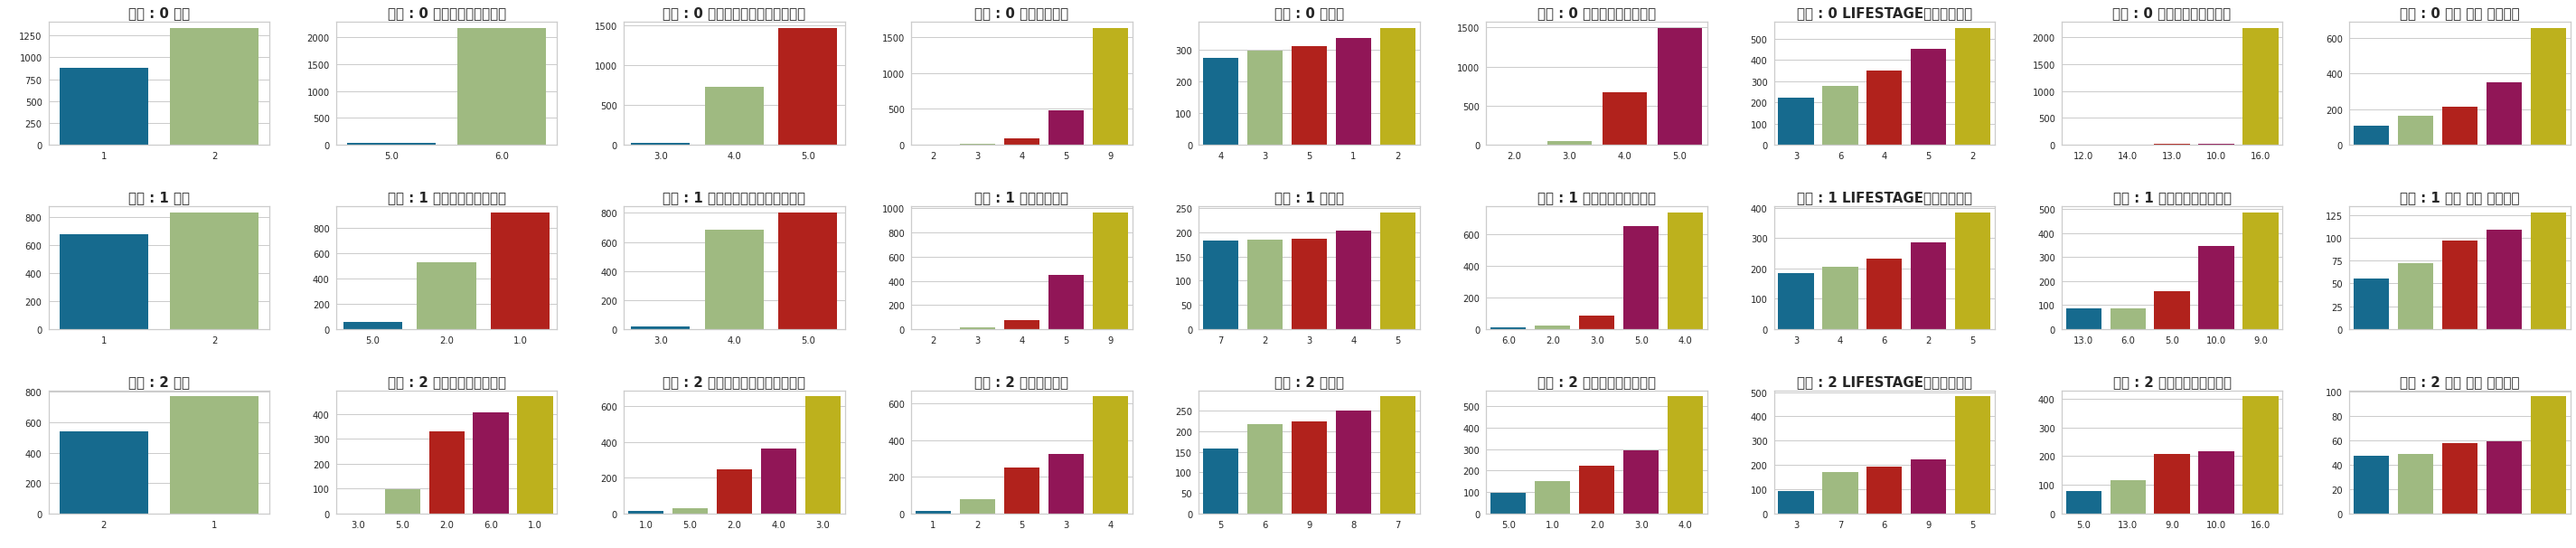

In [ ]:
name_list = ['성별', '주거래시장구분코드','자산기준주식거래유형코드' ,'고객등급코드', '연령대', '충성도세그먼트코드', 'LIFESTAGE세그먼트코드', '주거래업종구분코드', '국내 주식 거래횟수']
group_plot(set_ko, 3, name_list)

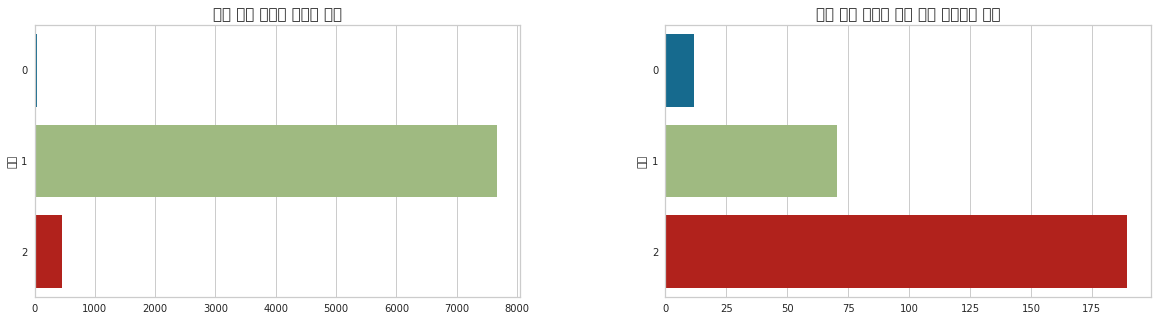

In [ ]:
name_list = ['변동률', '국내 주식 거래횟수']
group_plot2(set_ko, '국내 주식 고객군',  name_list)

- 국내 주식만을 사용하는 고객군 내에서 총 3개의 군집으로 나눌 수 있습니다.

&nbsp;

- 0번 군집
  - 25~30 사이의 사회초년생이 가장 많이 차지하고 있음
  - 대부분 비매매를 하며 자산의 변동이 크지 않습니다.

- 1번 군집
  - 40~45 사이의 가족 성숙기_직장인이 가장 많이 차지하고
  - 거래소, 코스닥을 통해 주로 거래를 수행합니다.
  - 가장 많은 관심을 보이는 종목은 전기/전자입니다.
  - 전체적인 자산의 변동이 가장 큰 군집입니다.

- 2번 군집
  - 50~55 사이의 가족 성숙기 직장인이 가장 많이 차지하고
  - 거래소를 통해 주로 거래합니다.
  - 주식 거래 횟수 평균이 제일 큼

&nbsp;

> 각 군집의 특성을 파악했을 때 `국내 주식만을 거래하지만, 주식을 이제 시작한 군집`, `국내 주식에 투자 대비 변동률이 큰 고객군`, `국내 주식의 거래를 많이 하지만 전체적인 변동률은 적은 고객군`

> 실제 상품을 추천한다면 국내 주식 상품 중에서 돈의 부담이 크지 않고 위험이 적은 상품은 0번 군집, risk가 크지만, 수익이 큰 상품은 1번 군집, risk가 크지 않고 적은 수익을 얻을 수 있는 상품은 2번 군집에서 추천할 수 있을 거 같습니다.

&nbsp;

- 해외 주식만 투자하는 고객군

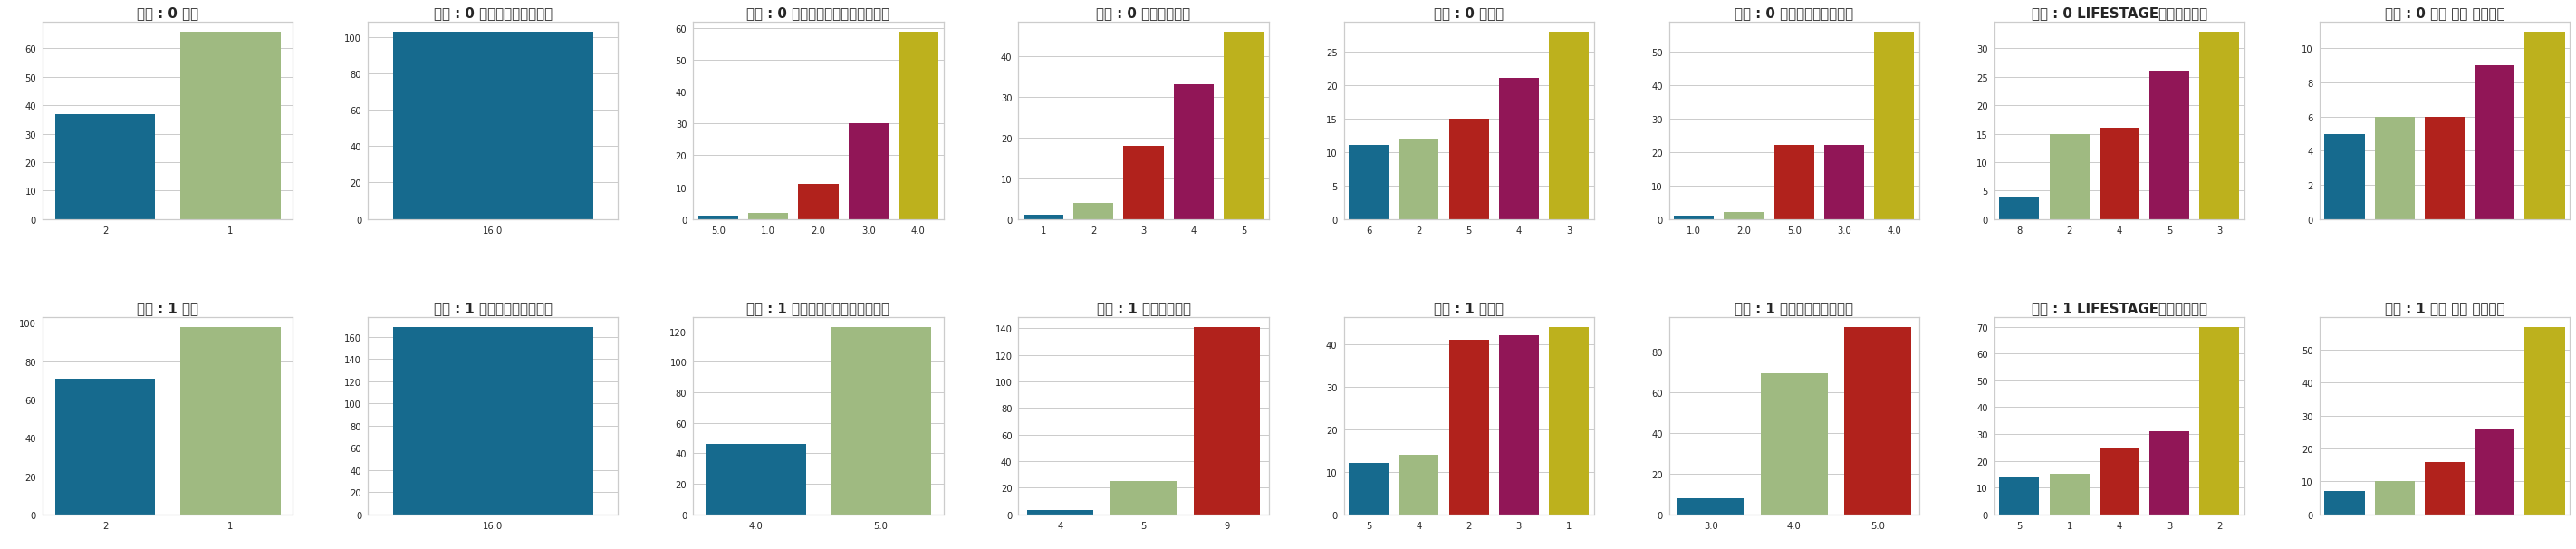

In [ ]:
name_list = ['성별', '주거래업종구분코드' ,'자산기준주식거래유형코드', '고객등급코드', '연령대', '충성도세그먼트코드', 'LIFESTAGE세그먼트코드', '해외 주식 거래횟수']
group_plot(set_os, 2, name_list)

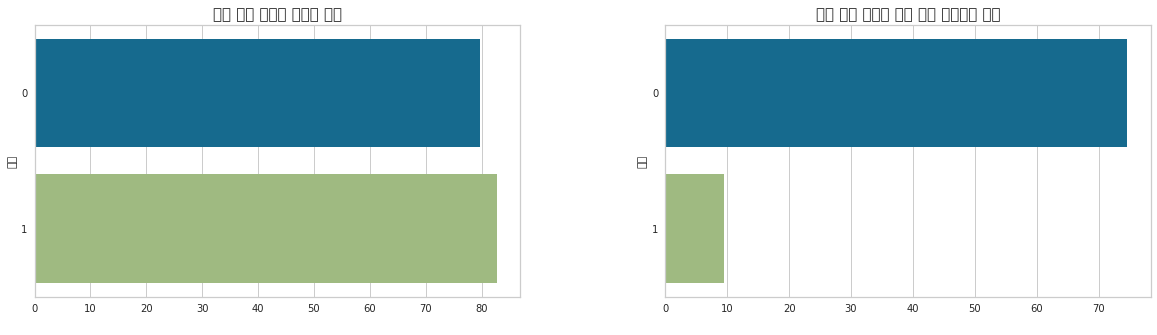

In [ ]:
name_list = ['변동률', '해외 주식 거래횟수']
group_plot2(set_os, '해외 주식 고객군',  name_list)

- 해외 주식만을 사용하는 고객군 내에서 총 2개의 군집으로 나눌 수 있습니다.

&nbsp;

- 0번 군집
  - 30~35 사이의 가족 형성기가 가장 많이 차지하고 있음
  - 자산 기준 거래유형은 MASS (500 만원 이상)
  - 대부분 비매매를 하며 자산의 변동이 큰 군집입니다.
  - 주식 거래 횟수 평균이 제일 큼

- 1번 군집
  - 25 미만, 30~ 35 사이의 사회 초년생이 많이 차지하고
  - 자산 기준 거래유형은 General (500 만원 미만)
  - 대부분 비매매를 하며 자산의 변동이 큰 군집입니다.


&nbsp;



> 각 군집의 특성을 파악했을 때 `해외 주식 거래량 대비 변동률이 적은 고객군`, `해외 주식 거래량 대비 변동률이 큰 고객군`으로 분류할 수 있습니다.

> 실제 상품을 추천한다면 해외 주식 상품 중에서 돈의 부담이 크지 않고 위험이 적은 상품은 0번 군집에 추천하고 큰 위험이 있지만 손익이 큰 상품에 대해서는 1번 군집 에게 마케팅을 수행하면 좋을 거 같습니다. 



&nbsp;

- 둘다 투자하는 고객군

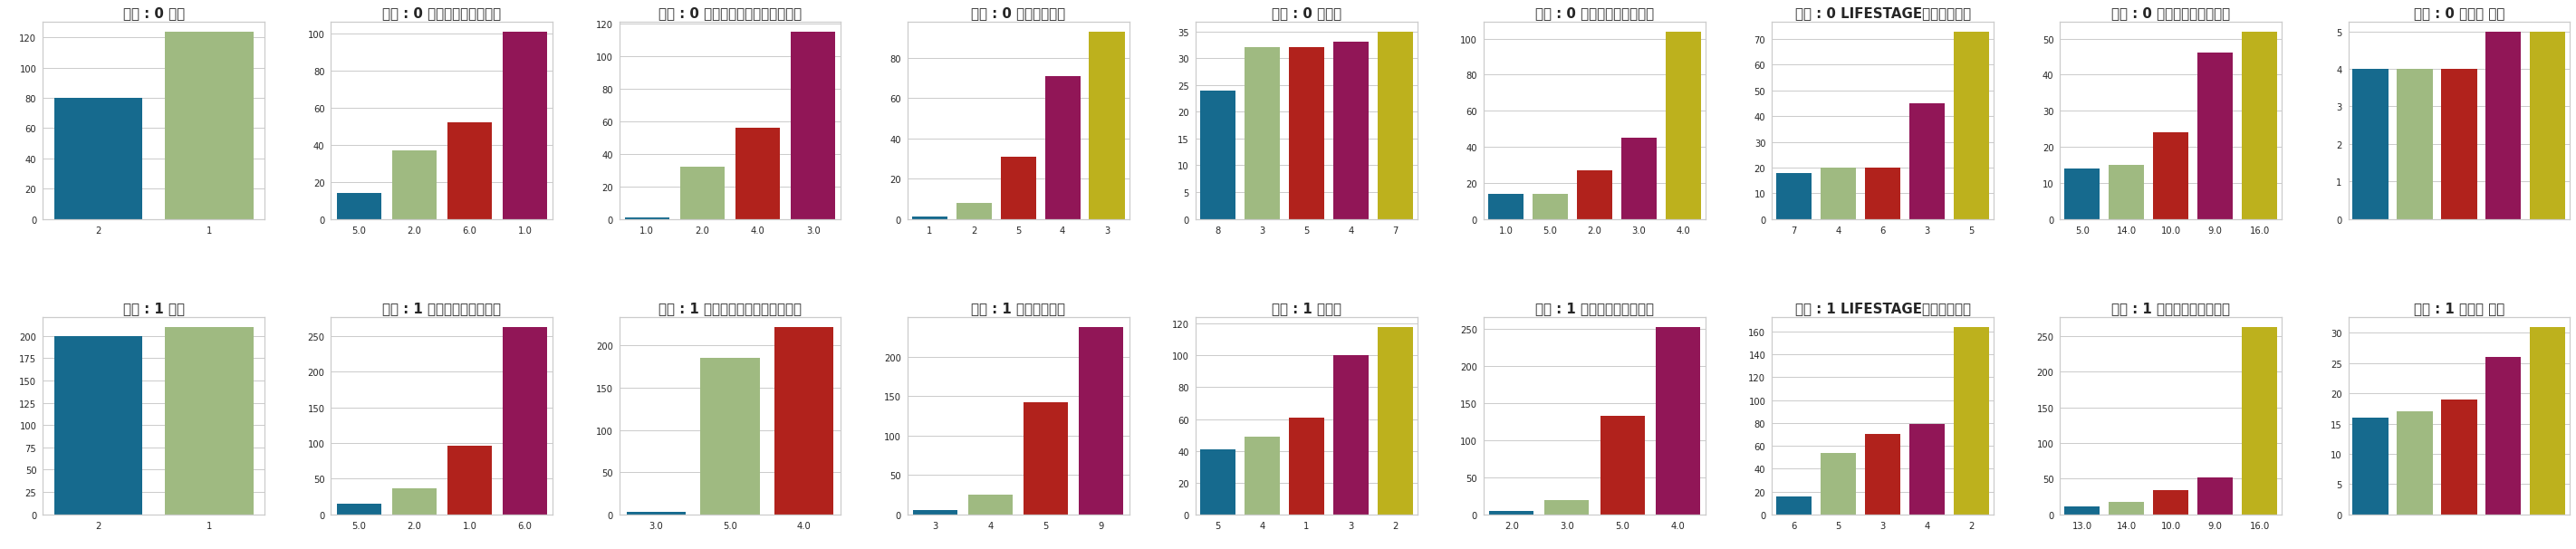

In [ ]:
name_list = ['성별', '주거래시장구분코드','자산기준주식거래유형코드', '고객등급코드', '연령대', '충성도세그먼트코드', 'LIFESTAGE세그먼트코드', '주거래업종구분코드', '총거래 횟수']
group_plot(set_ko_os, 2, name_list)

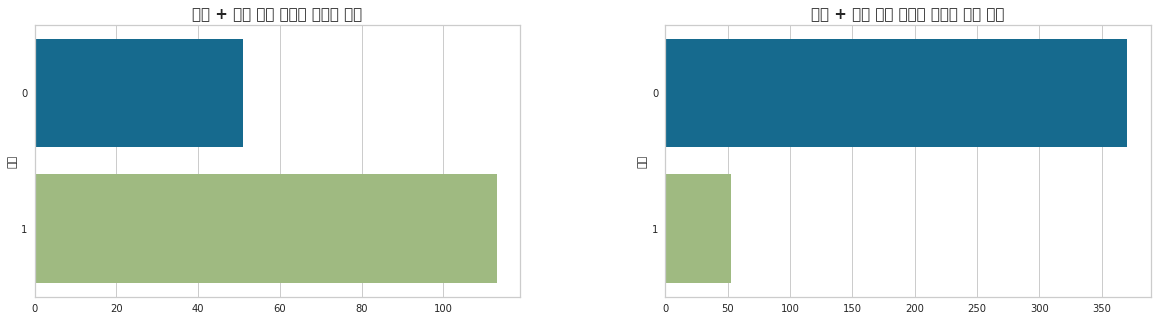

In [ ]:
name_list = ['변동률', '총거래 횟수']
group_plot2(set_ko_os, '국내 + 해외 주식 고객군',  name_list)

- 국내 + 해외 주식을 사용하는 고객군 내에서 총 2개의 군집으로 나눌 수 있습니다.

&nbsp;

- 0번 군집
  - 50~55 사이의 가족 성숙기 직장인이 가장 많이 차지하고 있음
  - 자산 기준 거래유형은 Mass-Affluent(3천만원 이상)로 충분한 자본을 가지고 투자
  - 대부분 거래소를 통해 거래하며 주식 거래 횟수 평균이 큰 군집입니다.

- 1번 군집
  - 25~30 사이의 사회 초년생이 많이 차지하고
  - 자산 기준 거래유형은 MASS(500만원 이상)
  - 주식 거래 횟수 평균 대비 변동률이 큰 군집입니다.



&nbsp;


> 각 군집의 특성을 파악했을 때 `충분한 자본을 통한 안정적 투자를 하는 고객군`, `공격적인 투자를 하는 고객군`으로 분류할 수 있습니다.

> 실제 상품을 추천한다면 손익보다 위험이 적은 상품은 0번 군집에 추천하고 위험이 있지만 손익이 큰 상품에 대해서는 1번 군집 에게 추천하면 좋을 거 같습니다. 


&nbsp;

## **최종 정리**

- **고객의 주식투자 유형을 통해 국내주식만 거래하는 고객, 해외 주식만 거래하는 고객, 둘다 거래하는 고객으로 분류했을때**

  &nbsp;

  - 해외 주식은 25 ~ 29 사이의`사회초년생`, `가족형성기_남자`에 해당하는 고객에게 추천
  - 국내 주식 관련에는 40 ~ 44 사이의 `가족성숙기`에 해당하는 고객에게 추천

&nbsp;

--------------------------

&nbsp;

- **고객군안에 군집을 통해 세부 분류했을때**
  
  &nbsp;

  - 국내 주식만 거래하는 고객
    - `국내 주식만을 거래하지만 주식을 이제 시작한 군집` : 돈의 부담이 크지않고 위험이 적은 상품 추천
    - `국내 주식에 투자대비 변동률이 큰 고객군` : risk가 크지만 수익이 큰 상품 추천
    - `국내 주식의 거래를 많이 하지만 전체적인 변동률은 적은 고객군` : risk가 크지않고 적은 수익을 얻을수 있는 상품
  
  &nbsp;

  - 해외 주식만 거래하는 고객
    - `해외 주식 거래량 대비 변동률이 적은 고객군` : 돈의 부담이 크지않고 위험이 적은 상품 추천
    - `해외 주식 거래량 대비 변동률이 큰 고객군` : 위험이 있지만 손익이 큰 상품 추천
  
  &nbsp;

  - 국내 + 해외 주식을 거래하는 고객
    - `충분한 자본을 통한 안정적 투자를 하는 고객군` : 손익보다 위험이 적은 상품 추천
    - `공격적인 투자를 하는 고객군` : 위험보다 손익이 큰 상품 추천
  

- 저장

In [ ]:
set_ko.to_csv('./국내주식고객군.csv', encoding="utf-8")
set_os.to_csv('./해외주식고객군.csv', encoding="utf-8")
set_ko_os.to_csv('./국내_해외_주식고객군.csv', encoding="utf-8")